# GAN (generative adversarial network)

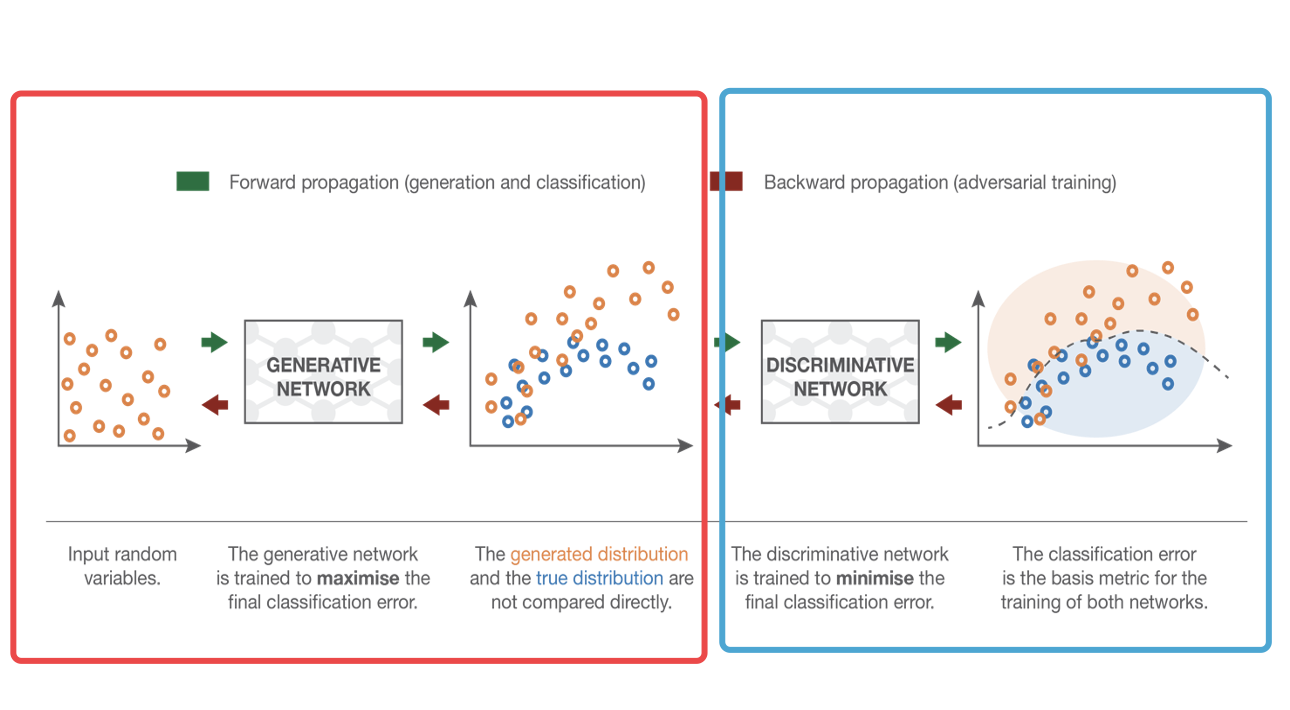

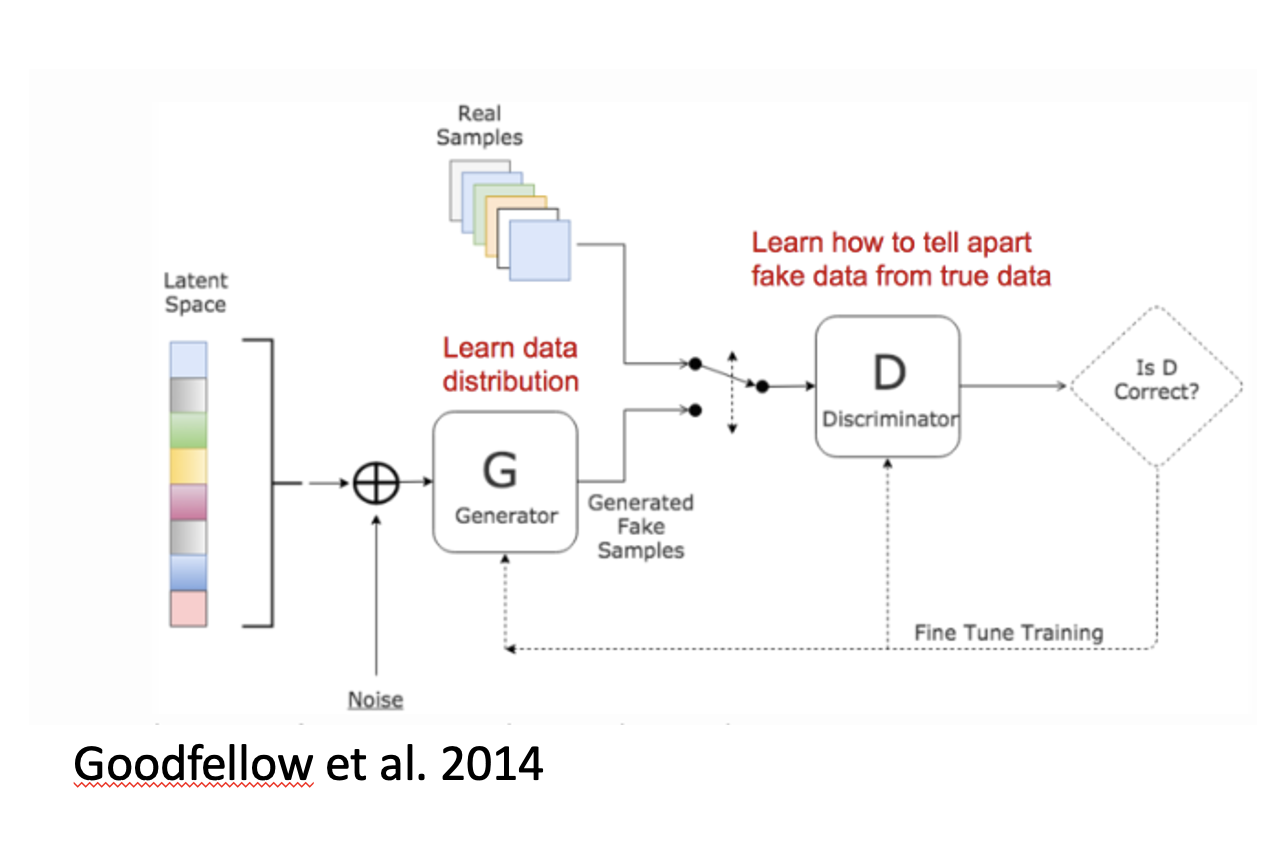

## architecture: 2 networks

2 nets is adversarial, play a **minimax** game

- generator: transforms random noise into sample from target distribution

    try to maximize loss, fool the discriminator

- discriminator: distinguish between generated (fake) samples and real samples

    try to minimize loss, catch the generator
 
- **indirect** way of matching distributions

minimax: minimize possible loss for a worse case scenario

maximin: maximize minimum gain

## training procedure

The training process alternates between updating the generator and the discriminator. 

1. Initialize the generator ($G$) and the discriminator ($D$) networks with random weights.

2. Set the number of epochs, batch size, and other hyperparameters.

3. For each epoch of real data and noise samples:

   Train the discriminator:

      1. Sample a batch of real data, $x \sim p_r(x)$.

      2. Sample a batch of noise, $z \sim p(z)$.

      3. Generate a batch of fake data using the generator, $G(z)$.

      4. Calculate the discriminator's output for the real and fake data, $D(x)$ and $D(G(z))$, respectively.

      5. Compute the discriminator's loss: $\mathcal{L}_D = \mathbb{E}[\log D(x)] + \mathbb{E}[\log(1 - D(G(z)))]$.

      6. Update the discriminator's weights by performing a gradient ascent step to maximize $\mathcal{L}_D$.
         
   Train the generator:

      1. Sample a new batch of noise, $z \sim p(z)$.

      2. Generate a batch of fake data using the generator, $G(z)$.

      3. Calculate the discriminator's output for the fake data, $D(G(z))$.

      4. Compute the generator's loss: $\mathcal{L}_G = \mathbb{E}[\log(1 - D(G(z)))]$.

      5. Update the generator's weights by performing a gradient descent step to minimize $\mathcal{L}_G$.
         
4. Repeat step 3 for the desired number of epochs or until a stopping criterion is met.

This training procedure allows the generator to learn to create realistic samples, while the discriminator learns to distinguish between real and generated samples. 

The process continues until the generator produces samples that are indistinguishable from real data, and the discriminator is unable to differentiate between them.


## loss function

$p_z$: data distribution over noise input $z$

$p_g$: generated data distribution over fake sample $g$

$p_r$: true data distribution over real sample $x$

### JS Divergence

The Jensen-Shannon (JS) Divergence is used to measure dissimilarity between real data distribution $p_r(x)$ and the generated data distribution $p_g(x)$. 

The JS Divergence is symmetric and smoother than the Kullback-Leibler (KL) divergence, making it more suitable for GAN training.

objective: minimize JS Divergence between real data distribution $p_r(x)$ and generated data distribution $p_g(x)$ by optimizing the generator and discriminator parameters. 

The JS Divergence is defined as:

$$
JS(p_r || p_g) = \frac{1}{2} KL(p_r || m) + \frac{1}{2} KL(p_g || m)
$$

Where:

- $m(x) = \frac{1}{2}(p_r(x) + p_g(x))$ is the mixture distribution.
- $KL(p || q)$ is the Kullback-Leibler (KL) divergence, defined as $KL(p || q) = \int p(x) \log \frac{p(x)}{q(x)} dx$.

Substituting the definition of $m(x)$ into the JS Divergence formula:

$$
JS(p_r || p_g) = \frac{1}{2} \int p_r(x) \log \frac{2p_r(x)}{p_r(x) + p_g(x)} dx + \frac{1}{2} \int p_g(x) \log \frac{2p_g(x)}{p_r(x) + p_g(x)} dx
$$

GAN does not optimize the JS Divergence directly but rather optimizes an approximation of it through the **minimax game**.


1. Generator is optimal: generated data distribution $p_g(x)$ perfectly matches the real data distribution $p_r(x)$. JS Divergence is minimized:

   $$
   JS(p_r || p_g) = 0
   $$

2. Discriminator is optimal:

   $$
   D^*(x) = \frac{p_r(x)}{p_r(x) + p_g(x)} \in [0, 1]
   $$

   The optimal discriminator does not directly provide the value of the JS Divergence.

3. Both generator and discriminator are optimal: generator perfectly matches the real data distribution, and the JS Divergence is minimized:

   $$
   JS(p_r || p_g) = 0
   $$

   optimal discriminator cannot distinguish between real and generated samples, and its output is constant:

   $$
   D^*(x) = -2\log2 \text{or}\frac{1}{2}
   $$


### minimax game

$$
\min_G \max_D L(D, G) = \underset{x\sim p_r(x)}{\mathbb{E}} \log D(x) + \underset{z\sim p_z(z)}{\mathbb{E}}\log (1- D(G(z)))
\\[1em]
= \underset{x\sim p_r(x)}{\mathbb{E}}\log D(x) +\underset{x\sim p_g(x)}{\mathbb{E}} \log (1-D(x))
$$

- generator wants to fool discriminator


1. maximize discriminator's answer on real samples
    
    $$
    \mathbb{E}_{x\sim p_r(x)} \left [ \log D(x) \right ]
    $$
    
    expectation over real sample $x$ of log of answer D of x,
    
    discriminator hope D(x) to be 1  $\Rightarrow loss=0$


2. maximize discriminator's answer on fake samples

    $$
    \mathbb{E}_{z\sim p_z(z)} \left [ \log (1-D(G(z))) \right ]
    $$
    
    expectation over noise input $z$ of log of (1 - answer D of G(z)),
    
    discriminator hope D(G(z)) to be 0  $\Rightarrow loss=0$

    generator hope D(G(z)) to be 1  $\Rightarrow loss=-\infty$


# problems with GAN

## vanishing gradient

### when generator is weak

In the original GAN formulation, the objective function involves a minimax game between the generator and the discriminator, which can lead to saturation and slow down learning. 

solution: **non-saturating minimization** 

modifies the GAN objective function to provide stronger gradients to the generator, improving learning and stability.

the generator's objective is changed to maximize $\mathbb{E}_{z \sim p(z)}[\log D(G(z))]$ instead of minimizing $\mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))]$. 

provides stronger gradients for generator, especially during the early stages of training when discriminator is strong. 

So, the new objectives for the generator and discriminator are:

- Generator ($G$):

  $$
  \max_G \mathbb{E}_{z \sim p(z)}[\log D(G(z))]
  $$

- Discriminator ($D$):

  $$
  \max_D \mathbb{E}_{x \sim p_r(x)}[\log D(x)] + \mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))]
  $$

Training procedure:

1. Train the discriminator ($D$) by maximizing its objective function.

2. Train the generator ($G$) by maximizing its modified objective function.

3. Alternate between steps 1 and 2 for a fixed number of iterations or until a stopping criterion is met.

### when discriminator is strong

- when discriminator is strong, regardless how generator is, generator has vanishing gradient

solution: **Wasserstein distance (WGAN)**

objective: EMD instead of the JS divergence. no logarithm 

$$
\min_G \max_{D \in \mathcal{F}} \mathbb{E}_{x \sim p_r(x)}D(x) - \mathbb{E}_{z \sim p(z)}D(G(z))
$$

Here, $\mathcal{F}$ represents the set of 1-Lipschitz functions, which enforces a constraint on the discriminator's gradient to ensure it lies within a certain range. 

In practice, this Lipschitz constraint is enforced by clipping the discriminator's weights or using a gradient penalty.

training procedure:

1. Train the discriminator ($D$) by maximizing its objective function, while enforcing the Lipschitz constraint.

2. Train the generator ($G$) by minimizing its objective function.

3. Alternate between steps 1 and 2 for a fixed number of iterations or until a stopping criterion is met.


## mode collapse

- mode collapse: generator always generate a limited modes of target data distribution, lack of diversity.

solutions

1. Feature matching:

   Instead of directly optimizing the discriminator's output, the generator is trained to match the statistics (e.g.expected value) of the features on an intermediate layer of the discriminator. This encourages the generator to produce diverse samples that match the overall structure of the real data.

2. Minibatch discrimination:

   minibatch batch gradient descent allows the discriminator to assess the diversity within a batch of generated samples. 